# FIR = Finite impulse response

On définit une classe FIR_filter calculant la moyenne d'un signal temporel sur une fenêtre glissante.
Le signal échantillonné est stocké dans un tableau numpy __samples__ de taille __NbSamples__ fixée par défaut à 16.

In [4]:
import numpy as np

class FIR_filter(object):
    def __init__(self, NbSamples=16):
        self.NbSamples = NbSamples
        self.pointer = 0
        self.slidingsum= 0
        self.samples=np.zeros((NbSamples,), dtype=npy.float64)

## Fonction membre update

* Une fonction __update__ permet de rajouter un nouvel échantillon.
* Elle __élimine__ le plus ancien. 
* Elle retourne la valeur moyennée du signal sur tous les échantillons.

_Indication_ : on utilisera une variable pointer indiquant l'emplacement de l'échantillon courante dans le tableau __samples__

L'algorithme de la fonction __update__ s'écrit :
1. Mettre à jour le pointeur circulaire :
   - Calculer le reste de la division du pointeur par le nombre total d'échantillons (`NbSamples`).
   - Cela permet de faire une boucle circulaire sur les échantillons.
2. Mettre à jour la somme glissante :
   - Soustraire la valeur de l'échantillon actuel pointé par `pointer` de la somme glissante (`slidingsum`).
3. Remplacer l'échantillon actuel :
   - Remplacer la valeur de l'échantillon à la position `pointer` par le nouvel échantillon (`newsample`).
4. Mettre à jour la somme glissante avec le nouvel échantillon :
   - Ajouter la valeur du nouvel échantillon à la somme glissante.
5. Incrémenter `pointer` :
   - Incrémenter `pointer`  de 1 pour qu'il pointe vers le prochain échantillon.
6. Calculer et retourner la moyenne glissante :
   - Diviser la somme glissante par le nombre total d'échantillons (`NbSamples`) pour obtenir la moyenne.
   - Retourner cette moyenne.


In [5]:
import numpy as np

class FIR_filter(object):
    def __init__(self, NbSamples=16):
        self.NbSamples = NbSamples
        self.pointer = 0
        self.slidingsum= 0
        self.samples=np.zeros((NbSamples,), dtype=float)
        
        
    def update(self, newsample):
        self.pointer  %= self.NbSamples;
        self.slidingsum -= self.samples[self.pointer]
        self.samples[self.pointer]= newsample;
        self.slidingsum += newsample
        self.pointer  += 1;      
        return self.slidingsum/self.NbSamples
    

## Tests 
Procéder à quelques tests. Afficher les attributs d'un objet avec la fonction magique __\_\_dict\_\___

In [6]:
fir=FIR_filter(10)
print(fir.update(1))
print(fir.update(2))
print(fir.__dict__)
print(fir.samples)
print(fir.__dict__['NbSamples'])

0.1
0.3
{'NbSamples': 10, 'pointer': 2, 'slidingsum': 3.0, 'samples': array([1., 2., 0., 0., 0., 0., 0., 0., 0., 0.])}
[1. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
10


## Sécurisation des données
Restreindre l'accès aux données de votre classe

La fonction publique NbSamples retourne le nombre d'échantillons. Montrer que l'utilisation d'un __property__
permet de simplifier son appel.

La surcharge de l'opérateur [ ] se fait grâce à la fonction magique __\_\_getitem\_\___(self, ix)
qui retournera la valeur de l'échantillon d'indice relatif ix par rapport au pointeur courant pointer.

In [7]:
import numpy as npy

class FIR_filter(object):
    def __init__(self, NbSamples=32):
        self.__NbSamples = NbSamples
        self.__pointer = 0
        self.__slidingsum= 0
        self.__samples=np.zeros((NbSamples,), dtype=float)
    
    def update(self, newsample):
        self.__pointer  %= self.__NbSamples;       
        self.__slidingsum -= self.__samples[self.__pointer]
        self.__samples[self.__pointer]= newsample;
        self.__slidingsum += newsample
        self.__pointer  += 1;
        
        return self.__slidingsum/self.__NbSamples
    
    def __getitem__(self, ix):
        """index relative to current value of pointer
        """
        pointer = (self.__pointer + ix) % self.__NbSamples
        return self.__samples[pointer]
    
    def __repr__(self):
        return npy.array_repr(self.__samples, precision=6, suppress_small=True)

In [9]:
x=np.array([1, 2, 3])
print(npy.array_repr(x, precision=6, suppress_small=True))
fir=FIR_filter(10)
print(fir)

array([1, 2, 3])
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [10]:
fir=FIR_filter(10)
print(fir.update(1))
print(fir.update(2))
print(fir.__dict__)
print(fir[-2], fir[-1], fir[0], fir[1])
print(fir)

0.1
0.3
{'_FIR_filter__NbSamples': 10, '_FIR_filter__pointer': 2, '_FIR_filter__slidingsum': 3.0, '_FIR_filter__samples': array([1., 2., 0., 0., 0., 0., 0., 0., 0., 0.])}
1.0 2.0 0.0 0.0
array([1., 2., 0., 0., 0., 0., 0., 0., 0., 0.])


## Application du FIR
On considère un signal sinusoidal d'amplitude 1 bruité par un bruit blanc [-1, 1]
de période 100 (s). 

On utilisera la fonction __uniform__ du module random pour générer ce bruit.

Le temps est discrétisé en pas de temps dt=0.5 (s).

On utilisera le module plotly ou Matplotlib pour afficher le signal bruit et le signal filtré.


## version plotly

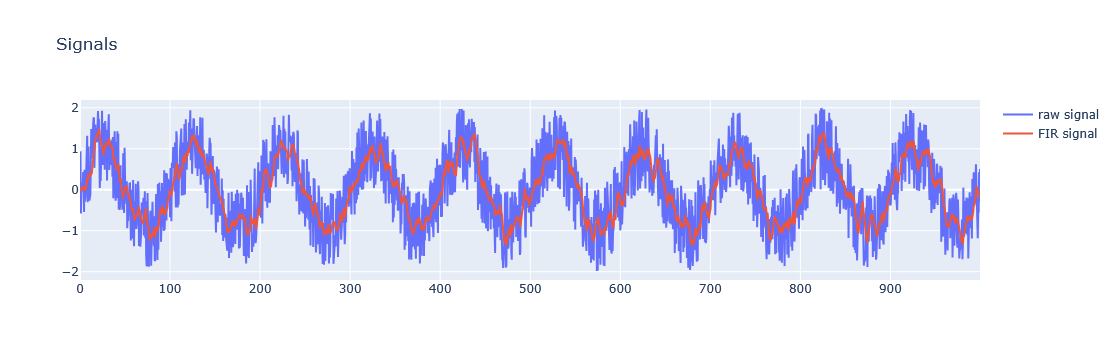

In [2]:
# version plotly 
from plotly import tools
import plotly.offline as py
import plotly.graph_objs as go

import random
import math
import numpy as np

class FIR_filter(object):
    def __init__(self, NbSamples=32):
        self.__NbSamples = NbSamples
        self.__pointer = 0
        self.__slidingsum= 0
        self.__samples=np.zeros((NbSamples,), dtype=float)
        
    @property
    def NbSamples(self):
        return self.__NbSamples
    
    def update(self, newsample):
        self.__pointer  %= self.__NbSamples;
        self.__slidingsum -= self.__samples[self.__pointer]
        self.__samples[self.__pointer]= newsample;
        self.__slidingsum += newsample
        self.__pointer  += 1;
        return self.__slidingsum/self.__NbSamples
    
if __name__ == "__main__":
    fir = FIR_filter(10)
    r=random.seed(1452)

    raw_data=[]
    fir_data=[]
    time =[]
    
    NT=2000
    T =100 # period
    dt=0.5    # time step
    for nt in range(NT):
        t = nt*dt
        r=random.uniform(-1., 1.)
        s=math.sin(2*math.pi/T*t)+r
        sf=fir.update(s)
        time.append(t)
        raw_data.append(s)
        fir_data.append(sf)

    # Make plotly work with Jupyter notebook using the plotly.js CDN
    py.init_notebook_mode(connected=True)

    trace1 = go.Scatter(
        x=time,
        y=raw_data,
        name='raw signal'
    )

    trace2 = go.Scatter(
        x=time,
        y=fir_data,
        name='FIR signal'
    )
        
    layout = go.Layout(
        title='Signals'
    )

    py.iplot({
        "data": [trace1, trace2],
        "layout": layout,
    })
    

# version matplotlib

In [34]:
# version matplotlib
%matplotlib
import matplotlib.pyplot as plt

import random
import math
import numpy as np

class FIR_filter(object):
    def __init__(self, NbSamples=32):
        self.__NbSamples = NbSamples
        self.__pointer = 0
        self.__slidingsum= 0
        self.__samples=np.zeros((NbSamples,), dtype=float)

    @property
    def NbSamples(self):
        return self.__NbSamples
        
    def update(self, newsample):
        self.__pointer  %= self.__NbSamples;
        self.__slidingsum -= self.__samples[self.__pointer]
        self.__samples[self.__pointer]= newsample;
        self.__slidingsum += newsample
        self.__pointer  += 1;
        return self.__slidingsum/self.__NbSamples
    
if __name__ == "__main__":
    fir = FIR_filter(10)
    r=random.seed(1452)

    raw_data=[]
    fir_data=[]
    time =[]
    
    NT=2000
    T =100 # period
    dt=0.5    # time step
    for nt in range(NT):
        t = nt*dt
        r=random.uniform(-1., 1.)
        s=math.sin(2*math.pi/T*t)+r
        sf=fir.update(s)
        time.append(t)
        raw_data.append(s)
        fir_data.append(sf)

    plt.figure()
    plt.plot(time, raw_data, 'r-')
    plt.plot(time, fir_data, 'b-')
    plt.draw()
    plt.legend(('raw', 'fir'), loc='upper right')

Using matplotlib backend: Qt5Agg


## Revisite avec utilisation d'un buffer circulaire avec les properties

Definir une classe CircularBuffer dont le constructeur initialise :
* un buffer dont la taille est celle du nombre d'echantillons ou à partir d'un iterable (liste, tableau numpy)
* un pointeur indiquant la position courante de lecture dans le buffer
Les fonctions membres sont :
* `data` retournant les donnees brutes stockees dans le buffer 
* le getter `pointer` retournant le pointeur courant
* le setter `pointer` fixant la valeur du pointeur
* `roll` mettant a jour le pointeur en vue d'une insertion
* `update` inserant une valeur dans le buffer
* `__getitem__` fonction magique retournant la valeur a une position donnee


In [9]:
import random
import math
import numpy as np

import matplotlib.pyplot as plt

class CircularBuffer:
    def __init__(self, x):
        if not hasattr(x, '__iter__'):
            self.__NbItems = x
            self.__items = np.zeros((x, ), dtype=npy.float64)
        else:
            self.__items = np.asarray(x, dtype=npy.float64)
            self.__NbItems  = self.__items.shape[0]
        self.__pointer = 0
        
    @property
    def items(self):
        ix = np.arange(self.__pointer, self.__pointer + self.__NbItems) % self.__NbItems
        return self.__items[ix]
                    
    @property
    def pointer(self):
        return self.__pointer
    
    @pointer.setter
    def pointer(self, x):
        self.__pointer = x
        
    def roll(self, k=1):
        self.pointer += k
        self.pointer %= self.__NbItems
        
    def update(self, s):
        """ insert new sample after current pointer location
        """
        self.roll()
        self.__items[self.__pointer] = s

        
    def __getitem__(self, ix):
        """index relative to current value of pointer
        """
        pointer = (self.pointer + ix) % self.__NbItems
        return self.__items[pointer]
    
buffer = CircularBuffer(list(range(10)))
print(buffer.__dict__)
print(buffer.items)
buffer.update(10)
print(buffer.items)
buffer.update(20)
print(buffer.items)
print(buffer.pointer)
print(buffer[-1], buffer[0])
buffer.update(30)
print(buffer[-2], buffer[-1], buffer[0])

{'_CircularBuffer__items': array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]), '_CircularBuffer__NbItems': 10, '_CircularBuffer__pointer': 0}
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[10.  2.  3.  4.  5.  6.  7.  8.  9.  0.]
[20.  3.  4.  5.  6.  7.  8.  9.  0. 10.]
2
10.0 20.0
10.0 20.0 30.0


* Définir un setter items permettant de simplifier le constructeur

In [10]:
import random
import math
import numpy as np

import matplotlib.pyplot as plt

class CircularBuffer:
    def __init__(self, data):
        self.items = data   # call the samples setter
                    
    @property
    def items(self):
        ix = np.arange(self.__pointer, self.__pointer + self.__NbItems) % self.__NbItems
        return self.__items[ix]

    @items.setter
    def items(self, x):
        print('items.setter')
        if not hasattr(x, '__iter__'):
            self.__NbItems = x
            self.__items = np.zeros((x, ), dtype=float)
        else:
            self.__items = np.asarray(x, dtype=float)
            self.__NbItems  = self.__items.shape[0]
        self.__pointer = 0
        
    @property
    def pointer(self):
        return self.__pointer
    
    @pointer.setter
    def pointer(self, x):
        self.__pointer = x
        
    def roll(self, k=1):
        self.pointer += k
        self.pointer %= self.__NbItems
        
    def update(self, s):
        """ insert new sample after current pointer location
        """
        self.roll()
        self.__items[self.__pointer] = s

        
    def __getitem__(self, ix):
        """index relative to current value of pointer
        """
        pointer = (self.pointer + ix) % self.__NbItems
        return self.__items[pointer]
    
lst = list(range(10))   
buffer = CircularBuffer(lst)
print(buffer.__dict__)
print(buffer.items)
buffer.update(10)
print(buffer.items)
buffer.update(20)
print(buffer.items)
print(buffer.pointer)
print(buffer[-1], buffer[0])
buffer.update(30)
print(buffer[-2], buffer[-1], buffer[0])

items.setter
{'_CircularBuffer__items': array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]), '_CircularBuffer__NbItems': 10, '_CircularBuffer__pointer': 0}
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[10.  2.  3.  4.  5.  6.  7.  8.  9.  0.]
[20.  3.  4.  5.  6.  7.  8.  9.  0. 10.]
2
10.0 20.0
10.0 20.0 30.0


In [16]:
import random
import math
import numpy as np

import matplotlib.pyplot as plt

class CircularBuffer:
    def __init__(self, data):
        self.items = data   # call the samples setter
                    
    @property
    def items(self):
        ix = np.arange(self.__pointer, self.__pointer + self.__NbItems) % self.__NbItems
        return self.__items[ix]

    @items.setter
    def items(self, x):
        print('items.setter')
        if not hasattr(x, '__iter__'):
            self.__NbItems = x
            self.__items = np.zeros((x, ), dtype=npy.float)
        else:
            self.__items = np.asarray(x, dtype=npy.float)
            self.__NbItems  = self.__items.shape[0]
        self.__pointer = 0
        
    @property
    def pointer(self):
        return self.__pointer
    
    @pointer.setter
    def pointer(self, x):
        self.__pointer = x
        
    def roll(self, k=1):
        self.pointer += k
        self.pointer %= self.__NbItems
        
    def update(self, s):
        """ insert new sample after current pointer location
        """
        self.roll()
        self.__items[self.__pointer] = s
   
    def __getitem__(self, ix):
        """index relative to current value of pointer
        """
        pointer = (self.pointer + ix) % self.__NbItems
        return self.__items[pointer]
    
class FIR_filter:
    def __init__(self, data):
        self.__buffer = CircularBuffer(data)
        self.weights  = data

    @property
    def NbSamples(self):
        return self.__NbSamples
    
    @property
    def weights(self):
        return self.__weights[::-1]
    
    @weights.setter
    def weights(self, x):
        print('setter')
        if hasattr(x, '__iter__'):
  #          self.__weights = np.asarray(x[::-1], dtype=npy.float) # NE MARCHE PAS EXPLIQUER POURQUOI
            self.__weights = np.array(x[::-1], dtype=npy.float64)
            self.__NbSamples = self.__weights.shape[0]
        else:
            self.__weights = npy.ones((x, ), dtype=npy.float64) / x
            self.__NbSamples = x
        
    def __call__(self, x):   # implements function call operator.
        self.__buffer.update(x)
        return (self.weights * self.__buffer.items).sum()
#        return (self.__weights[::-1] * self.__buffer.items[-self.__NbSamples:]).sum() # equivalent
    
if __name__ == "__main__":
#    fir = FIR_filter(10)
    weights=npy.array([1/(x+1) for x in range(16)])   
#    weights=npy.ones((16, ))  
    weights /= weights.sum()
#    weights = npy.zeros_like(weights)
#    weights[0]=1
#    print(weights)
    
    fir = FIR_filter(weights)
    print(fir.weights)
    print('------------')
    r=random.seed(1452)

    sf=fir(1)
    print(sf)
    sf=fir(1)
    print(sf)
    sf=fir(1)
    print(sf)   
    
    raw_data=[]
    fir_data=[]
    time =[]
    
    NT=2000
    T =100 # period
    dt=0.5    # time step
    for nt in range(NT):
        t = nt*dt
        r=random.uniform(-1., 1.)
        s=math.sin(2*math.pi/T*t)+r
        sf=fir(s)
        time.append(t)
        raw_data.append(s)
        fir_data.append(sf)

    plt.figure()
    plt.plot(time, raw_data, 'r-')
    plt.plot(time, fir_data, 'b-')
    plt.draw()
    plt.legend(('raw', 'fir'), loc='upper right')

items.setter
setter
[0.29579419 0.1478971  0.09859806 0.07394855 0.05915884 0.04929903
 0.04225631 0.03697427 0.03286602 0.02957942 0.02689038 0.02464952
 0.0227534  0.02112816 0.01971961 0.01848714]
------------
0.3395412936566362
0.35091952657599423
0.3659953497680307


<ipython-input-16-3714549e37f9>:23: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.__items = npy.asarray(x, dtype=npy.float)


In [10]:
lst=list(range(10))
print(lst)
print(lst[-5:])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[5, 6, 7, 8, 9]


#  Transformée de fourier discrète
La technique usuelle pour déterminer les fréquences caractéristiques ainsi que l’amplitude des harmoniques qui composent un signal, consiste à calculer sa transformée de fourier. 

Dans une approche numérique, cette opération est effectuée sur un ensemble de valeurs échantillonnées.

Le but est d'utiliser ici le module scipy.fftpack pour calculer les transformées de fourier directe
et inverse.

## définitions

La transformée directe d'un signal __périodique__ s échantillonné en N points 
est définie par :
$$ft[k]=\sum_{n=0}^{N-1}  s[n] \exp(-i \frac{2\pi k}{N}n)$$
où $k \in [0, N-1]$ avec $i^2=-1$.

Sa transformée inverse est :

$$s[n]=\frac{1}{N} \sum_{k=0}^{N-1}  ft[n] \exp(+i \frac{2\pi k}{N}n)$$

Appliquer  ces définitions à un signal non périodique, revient à la périodiser avec une période entière N.

In [11]:
# version plotly 
from plotly import tools
import plotly.offline as py
import plotly.graph_objs as go

import scipy.fftpack as fftpack

raw_fft = fftpack.fft(raw_data)
fir_fft = fftpack.fft(fir_data)

# Make plotly work with Jupyter notebook using the plotly.js CDN
py.init_notebook_mode(connected=True)
    
trace1 = go.Scatter(
    y=abs(raw_fft),
    mode = 'lines+markers',
    name='Abs(raw_fft)'
)

trace2 = go.Scatter(
    y=abs(fir_fft),
    mode = 'lines+markers',
    name='Abs(fir_fft)'
)

fig = tools.make_subplots(rows=1, cols=2)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

fig['layout'].update(title='2 subplots')

fig['layout'].update(    
    xaxis1=dict(   
        title='x Axis 1',
        titlefont=dict(
            family='Courier New, monospace',   #police
            size=18,
            color='#7f7f7f'                    #couleur du texte
        )),
    xaxis2=dict(
        title='x Axis 2',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        ))
                    
                    )

py.iplot(fig)


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



# Passage aux fréquences physiques
Le signal brut a été echantillonné avec une fréquence d'échantillonnage f_s=1/dt
Le nombre de pas réalisés est NT et correspond à une durée d'analyse T = NT . dt
Les fréquences physiques explorées s'étendent de
f = [0, 1, ...,   NT/2-1,     -NT/2, ..., -1] / (NT . dt) pour NT pair.

Lire la documentation des fonctions __npy.fft.fftfreq__ et __npy.fft.fftshift__

In [12]:
import numpy as npy
help(npy.fft.fftfreq)
help(npy.fft.fftshift)

Help on function fftfreq in module numpy.fft:

fftfreq(n, d=1.0)
    Return the Discrete Fourier Transform sample frequencies.
    
    The returned float array `f` contains the frequency bin centers in cycles
    per unit of the sample spacing (with zero at the start).  For instance, if
    the sample spacing is in seconds, then the frequency unit is cycles/second.
    
    Given a window length `n` and a sample spacing `d`::
    
      f = [0, 1, ...,   n/2-1,     -n/2, ..., -1] / (d*n)   if n is even
      f = [0, 1, ..., (n-1)/2, -(n-1)/2, ..., -1] / (d*n)   if n is odd
    
    Parameters
    ----------
    n : int
        Window length.
    d : scalar, optional
        Sample spacing (inverse of the sampling rate). Defaults to 1.
    
    Returns
    -------
    f : ndarray
        Array of length `n` containing the sample frequencies.
    
    Examples
    --------
    >>> signal = np.array([-2, 8, 6, 4, 1, 0, 3, 5], dtype=float)
    >>> fourier = np.fft.fft(signal)
    >>> n = 

In [13]:
import scipy.fftpack as fftpack

freq = npy.fft.fftfreq(len(raw_data), dt)
freqshift = npy.fft.fftshift(freq)

raw_fft = fftpack.fft(raw_data)
fir_fft = fftpack.fft(fir_data)

raw_fftshift = fftpack.fftshift(raw_fft)
fir_fftshift = fftpack.fftshift(fir_fft)

trace1 = go.Scatter(
    x=freqshift,
    y=abs(raw_fftshift),
    mode = 'lines+markers',
    name='Abs(raw_fft)'
)

trace2 = go.Scatter(
    x=freqshift,
    y=abs(fir_fftshift),
    mode = 'lines+markers',
    name='Abs(fir_fft)'
)

fig = tools.make_subplots(rows=1, cols=2)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

fig['layout'].update(title='2 subplots')

fig['layout'].update(    
    xaxis1=dict(   
        title='x Axis 1',
        titlefont=dict(
            family='Courier New, monospace',   #police
            size=18,
            color='#7f7f7f'                    #couleur du texte
        )),
    xaxis2=dict(
        title='x Axis 2',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        ))
                    
                    )

py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [14]:
import cmath
filter = lambda f :npy.sum([cmath.exp(2*cmath.pi*f*1j*n*dt)*fir.weights[n] 
                            for n in range(fir.NbSamples)])

freq = [2*math.pi/T/100*nf for nf in range(100)]
ampl=[]
for f in freq:
    a = abs(filter(f))/fir.NbSamples
    ampl.append(a)
    
    # Make plotly work with Jupyter notebook using the plotly.js CDN
py.init_notebook_mode(connected=True)

trace1 = go.Scatter(
    x=freq,
    y=ampl,
    name='raw signal'
)

layout = go.Layout(
    title='FIR'
)

py.iplot({
    "data": [trace1],
    "layout": layout,
})    
    

In [15]:
print(fir.weights[1])

0.14789709586346975


In [16]:
g=[]
for nf, f in enumerate(freqshift):
    a = filter(f) #/fir.NbSamples
    g.append(raw_fftshift[nf]*a)

    # Make plotly work with Jupyter notebook using the plotly.js CDN
py.init_notebook_mode(connected=True)

trace1 = go.Scatter(
    x=freqshift,
    y=npy.abs(g),
    mode = 'lines+markers',
    name='fir signal'
)

layout = go.Layout(
    title='FIR'
)

trace2 = go.Scatter(
    x=freqshift,
    y=abs(fir_fftshift),
    mode = 'lines+markers',
    name='Abs(fir_fft)'
)

fig = tools.make_subplots(rows=1, cols=2)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

fig['layout'].update(title='2 subplots')

fig['layout'].update(    
    xaxis1=dict(   
        title='x Axis 1',
        titlefont=dict(
            family='Courier New, monospace',   #police
            size=18,
            color='#7f7f7f'                    #couleur du texte
        )),
    xaxis2=dict(
        title='x Axis 2',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        ))
            )

py.iplot(fig)    
    

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]

